<a href="https://colab.research.google.com/github/adamasturia/HSRC6guarantee/blob/main/starrailc6_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

def simulate_rolls():
    num_rolls = 0
    num_copies = 0
    guaranteed = False  # whether the next 5-star character is guaranteed to be the desired one
    while num_copies < 7:
        for i in range(90):  # simulate up to 90 rolls
            num_rolls += 1
            if i < 70:  # before soft pity
                if random.random() < 0.006:  # 0.6% chance of getting a 5-star character
                    if guaranteed or random.random() > 0.5:  # 50% chance of getting the desired character
                        num_copies += 1
                        guaranteed = False
                    else:
                        guaranteed = True
                    break
            else:  # after soft pity
                # linear increase from 0.6% to 100% over 20 rolls
                chance = 0.006 + (1 - 0.006) * (i - 70) / 20
                if random.random() < chance:
                  if guaranteed or random.random() > 0.5:  # 50% chance of getting the desired character
                      num_copies += 1
                      guaranteed = False
                  else:
                    guaranteed = True
                    break
    return num_rolls

# Run the simulation multiple times to get an average
total_rolls = 0
num_simulations = 100000
for _ in range(num_simulations):
    total_rolls += simulate_rolls()

average_rolls = total_rolls / num_simulations
print(f"On average, you need to roll {average_rolls} times to get 7 copies of a 5-star character.")


On average, you need to roll 377.11033 times to get 7 copies of a 5-star character.


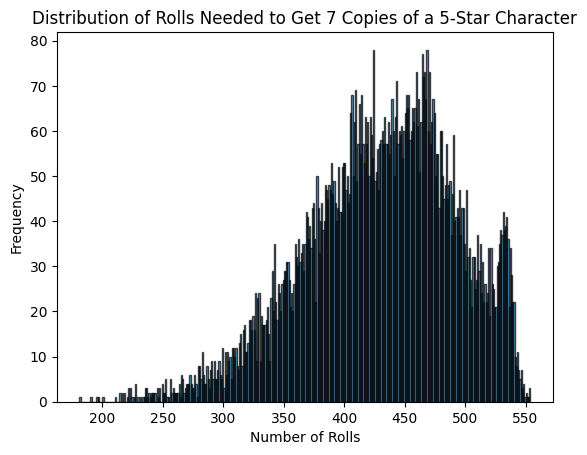

In [ ]:
import random
import matplotlib.pyplot as plt

def simulate_rolls():
    num_rolls = 0
    num_copies = 0
    while num_copies < 7:
        for i in range(90):  # simulate up to 90 rolls
            num_rolls += 1
            if i < 70:  # before soft pity
                if random.random() < 0.006:  # 0.6% chance of getting a 5-star character
                    num_copies += 1
                    break
            else:  # after soft pity
                # linear increase from 0.6% to 100% over 20 rolls
                chance = 0.006 + (1 - 0.006) * (i - 70) / 20
                if random.random() < chance:
                    num_copies += 1
                    break
    return num_rolls

# Run the simulation multiple times to get an average
num_simulations = 10000
results = []
for _ in range(num_simulations):
    results.append(simulate_rolls())

# Plot the distribution of the number of rolls needed
plt.hist(results, bins=range(min(results), max(results) + 1), alpha=0.7, edgecolor='black')
plt.title('Distribution of Rolls Needed to Get 7 Copies of a 5-Star Character')
plt.xlabel('Number of Rolls')
plt.ylabel('Frequency')
plt.show()


On average, you need to roll 377.071388 times to get 7 copies of a 5-star character.
The standard deviation is 110.9337234601471
The value that gives a 95% chance of getting 7 copies is 559.3549973846546


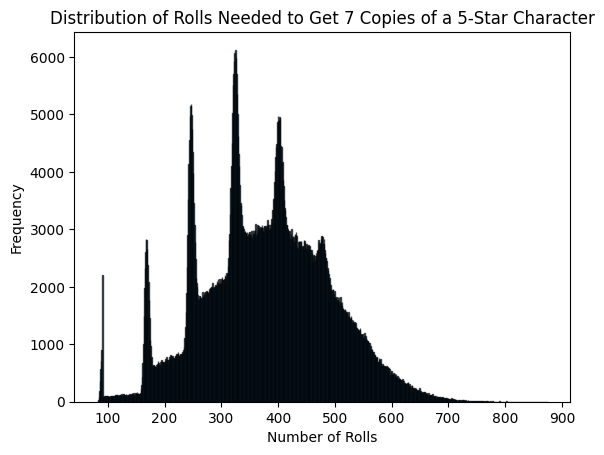

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def simulate_rolls():
    num_rolls = 0
    num_copies = 0
    guaranteed = False  # whether the next 5-star character is guaranteed to be the desired one
    while num_copies < 7:
        for i in range(90):  # simulate up to 90 rolls
            num_rolls += 1
            if i < 70:  # before soft pity
                if random.random() < 0.006:  # 0.6% chance of getting a 5-star character
                    if guaranteed or random.random() > 0.5:  # 50% chance of getting the desired character
                        num_copies += 1
                        guaranteed = False
                    else:
                        guaranteed = True
                    break
            else:  # after soft pity
                # linear increase from 0.6% to 100% over 20 rolls
                chance = 0.006 + (1 - 0.006) * (i - 70) / 20
                if random.random() < chance:
                  if guaranteed or random.random() > 0.5:  # 50% chance of getting the desired character
                      num_copies += 1
                      guaranteed = False
                  else:
                    guaranteed = True
                  break
    return num_rolls

# Run the simulation multiple times to get an average
total_rolls = 0
num_simulations = 1000000
results = []
for _ in range(num_simulations):
    results.append(simulate_rolls())
    total_rolls += simulate_rolls()

average_rolls = total_rolls / num_simulations
print(f"On average, you need to roll {average_rolls} times to get 7 copies of a 5-star character.")


# Calculate the standard deviation
std_dev = np.std(results)
print(f"The standard deviation is {std_dev}")

# Calculate the value corresponding to a 95% chance
value_95 = norm.ppf(0.95, loc=np.mean(results), scale=std_dev)
print(f"The value that gives a 95% chance of getting 7 copies is {value_95}")

# Plot the distribution of the number of rolls needed
plt.hist(results, bins=range(min(results), max(results) + 1), alpha=0.7, edgecolor='black')
plt.title('Distribution of Rolls Needed to Get 7 Copies of a 5-Star Character')
plt.xlabel('Number of Rolls')
plt.ylabel('Frequency')
plt.show()


In [ ]:
value_90 = norm.ppf(0.90, loc=np.mean(results), scale=std_dev)
print(f"The value that gives a 90% chance of getting 7 copies is {value_90}")

The value that gives a 90% chance of getting 7 copies is 519.0525469720433


In [ ]:
value_68 = norm.ppf(0.68, loc=np.mean(results), scale=std_dev)
print(f"The value that gives a 68% chance of getting 7 copies is {value_68}")

The value that gives a 68% chance of getting 7 copies is 428.7688292436118


In [ ]:
# Calculate the odds of getting the characters in the smallest and largest number of rolls possible
odds_min = results.count(7) / num_simulations
odds_max = results.count(14*90) / num_simulations
print(f"The odds of getting the characters in the smallest number of rolls possible (7) is {odds_min:.3e}")
print(f"The odds of getting the characters in the largest number of rolls possible (14*90) is {odds_max:.3e}")

The odds of getting the characters in the smallest number of rolls possible (7) is 0.000e+00
The odds of getting the characters in the largest number of rolls possible (14*90) is 0.000e+00


The standard deviation is 111.77238323611266
The value that gives a 95% chance of getting 7 copies is 828.0803759589298
The odds of getting the characters in the smallest number of rolls possible (7) is 0.000e+00
The odds of getting the characters in the largest number of rolls possible (14*90) is 0.000e+00


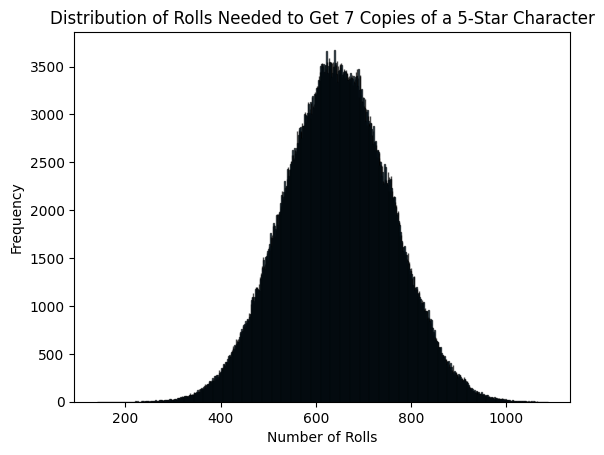

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def simulate_rolls():
    num_rolls = 0
    num_copies = 0
    guaranteed = False  # whether the next 5-star character is guaranteed to be the desired one
    while num_copies < 7:
        for i in range(90):  # simulate up to 90 rolls
            num_rolls += 1
            if i < 70:  # before soft pity
                if random.random() < 0.006:  # 0.6% chance of getting a 5-star character
                    if guaranteed or random.random() > 0.5:  # 50% chance of getting the desired character
                        num_copies += 1
                        guaranteed = False
                    else:
                        guaranteed = True
                    break
            else:  # after soft pity
                # linear increase from 0.6% to 100% over 20 rolls
                chance = 0.006 + (1 - 0.006) * (i - 70) / 20
                if random.random() < chance:
                    if guaranteed or random.random() > 0.5:  # 50% chance of getting the desired character
                        num_copies += 1
                        guaranteed = False
                    else:
                        guaranteed = True
                    break
    return num_rolls

# Run the simulation multiple times to get an average
num_simulations = 1000000
results = []
for _ in range(num_simulations):
    results.append(simulate_rolls())

# Calculate the standard deviation
std_dev = np.std(results)
print(f"The standard deviation is {std_dev}")

# Calculate the value corresponding to a 95% chance
value_95 = norm.ppf(0.95, loc=np.mean(results), scale=std_dev)
print(f"The value that gives a 95% chance of getting 7 copies is {value_95}")

# Calculate the odds of getting the characters in the smallest and largest number of rolls possible
odds_min = results.count(7) / num_simulations
odds_max = results.count(14*90) / num_simulations
print(f"The odds of getting the characters in the smallest number of rolls possible (7) is {odds_min:.3e}")
print(f"The odds of getting the characters in the largest number of rolls possible (14*90) is {odds_max:.3e}")

# Plot the distribution of the number of rolls needed
plt.hist(results, bins=range(min(results), max(results) + 1), alpha=0.7, edgecolor='black')
plt.title('Distribution of Rolls Needed to Get 7 Copies of a 5-Star Character')
plt.xlabel('Number of Rolls')
plt.ylabel('Frequency')
plt.show()


In [ ]:
value_90 = norm.ppf(0.90, loc=np.mean(results), scale=std_dev)
print(f"The value that gives a 90% chance of getting 7 copies is {value_90}")
value_68 = norm.ppf(0.68, loc=np.mean(results), scale=std_dev)
print(f"The value that gives a 68% chance of getting 7 copies is {value_68}")
value_50 = norm.ppf(0.50, loc=np.mean(results), scale=std_dev)
print(f"The value that gives a 50% chance of getting 7 copies is {value_50}")

The value that gives a 90% chance of getting 7 copies is 787.4732387208912
The value that gives a 68% chance of getting 7 copies is 696.5069754136965
The value that gives a 50% chance of getting 7 copies is 644.231166


In [ ]:
j=0
total_rolls=0
while j<len(results):
  total_rolls+=results[j]
  j+=1

average_rolls = total_rolls / 1000000
print(f"On average, you need to roll {average_rolls} times to get 7 copies of a 5-star character.")

On average, you need to roll 644.231166 times to get 7 copies of a 5-star character.
